# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import Stats and Linear Regression
from scipy import stats
from scipy.stats import linregress

In [45]:
# Import API key
from api_keys import api_key

In [46]:
from citipy import citipy

In [47]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
# Set up url path as a string - City will be added to the query later 
url = 'http://api.openweathermap.org/data/2.5/weather?q='

In [50]:
# Establish varibales i.e. lists that will become the columns of the dataframe
names = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Create a count to track the number of cities I am looking at
count = 1

In [51]:
# Saving all config information - url is same as above
url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'Imperial'

In [52]:
# Trying to query just one city / show a response because I think I am out of API requests
query_url = f"{url}{city}&appid={api_key}&units={units}"
response = requests.get(query_url).json()
response

{'coord': {'lon': 38.73, 'lat': 8.96},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 59,
  'feels_like': 51.24,
  'temp_min': 59,
  'temp_max': 59,
  'pressure': 1026,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 11.41, 'deg': 70},
 'clouds': {'all': 40},
 'dt': 1576516094,
 'sys': {'type': 1,
  'id': 2453,
  'country': 'ET',
  'sunrise': 1576467146,
  'sunset': 1576508917},
 'timezone': 10800,
 'id': 344979,
 'name': 'Lebu',
 'cod': 200}

In [53]:
# Loop through all cities to collect responses of the data we need
# Append the data with the criteria from API Geo Coordinates response
for city in cities:
    query_url = f"{url}{city}&APPID={api_key}&units={units}"
    try:
        response = requests.get(query_url).json()
        names.append(response['name'])
    except:
        print("City Not Found")
    else:
        city_name = response['name']
        print(f'Processing record {count} | {city_name}')
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        count = count + 1


Processing record 1 | Severo-Kurilsk
Processing record 2 | Airai
Processing record 3 | Guerrero Negro
Processing record 4 | Pevek
Processing record 5 | Clarence Town
Processing record 6 | Broome
Processing record 7 | East London
Processing record 8 | Richards Bay
Processing record 9 | Jamestown
Processing record 10 | Mega
Processing record 11 | Dalbandin
Processing record 12 | Robertsport
Processing record 13 | Ushuaia
Processing record 14 | Tiksi
Processing record 15 | Bluff
Processing record 16 | Maniitsoq
Processing record 17 | Bud
Processing record 18 | Albany
Processing record 19 | Barrow
Processing record 20 | Gorgan
Processing record 21 | Deputatskiy
Processing record 22 | Ancud
Processing record 23 | Ponta do Sol
Processing record 24 | Kawalu
Processing record 25 | Ekhabi
Processing record 26 | New Norfolk
Processing record 27 | Mamakan
Processing record 28 | Mataura
Processing record 29 | Saint-Joseph
Processing record 30 | Vila Velha
City Not Found
Processing record 31 | Niko

Processing record 237 | Prainha
Processing record 238 | Gushikawa
City Not Found
Processing record 239 | Atar
Processing record 240 | Zhanaozen
Processing record 241 | Saskylakh
Processing record 242 | Aklavik
Processing record 243 | Camacupa
Processing record 244 | Nanlong
Processing record 245 | Ruteng
Processing record 246 | Livingston
Processing record 247 | Clyde River
Processing record 248 | Kota Kinabalu
Processing record 249 | Praia
Processing record 250 | Husavik
Processing record 251 | Rantepao
Processing record 252 | Naze
Processing record 253 | Sangar
City Not Found
Processing record 254 | Fairbanks
Processing record 255 | Hauterive
Processing record 256 | Muli
Processing record 257 | Zeya
Processing record 258 | Ambanja
Processing record 259 | Hrinova
Processing record 260 | Vanimo
Processing record 261 | Isangel
Processing record 262 | Kruisfontein
Processing record 263 | Mahebourg
Processing record 264 | Lata
Processing record 265 | Merauke
Processing record 266 | Ostrov

Processing record 475 | Pio XII
Processing record 476 | Atoyac
Processing record 477 | Emerald
Processing record 478 | Manjeshwar
Processing record 479 | Kieta
Processing record 480 | Tangua
Processing record 481 | Punta Cardon
City Not Found
Processing record 482 | Yarada
Processing record 483 | Detchino
Processing record 484 | Petalcingo
Processing record 485 | Mugur-Aksy
Processing record 486 | Ust-Maya
Processing record 487 | Ust-Kut
Processing record 488 | Sanming
Processing record 489 | Nijar
Processing record 490 | Port-Gentil
Processing record 491 | Coihaique
Processing record 492 | Ichinohe
Processing record 493 | Arona
Processing record 494 | Iqaluit
Processing record 495 | Constitucion
Processing record 496 | Tezu
Processing record 497 | Nouadhibou
Processing record 498 | Nchelenge
Processing record 499 | Marawi
Processing record 500 | Marienburg
Processing record 501 | Pontianak
Processing record 502 | Rjukan
Processing record 503 | Bekhtery
Processing record 504 | Port Har

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
# Create a City Weather dataframe
weather = {
    "City": names,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

city_weather = pd.DataFrame(weather)
city_weather.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [55]:
# Conver the city weather into a csv
city_weather.to_csv('cities.csv')
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Severo-Kurilsk,93,RU,1576516099,93,50.68,156.12,24.04,8.75
1,Airai,97,TL,1576516100,92,-8.93,125.41,66.97,2.04
2,Guerrero Negro,0,MX,1576516100,38,27.97,-114.04,64.98,3.78
3,Pevek,100,RU,1576516100,93,69.70,170.27,-3.66,2.82
4,Clarence Town,90,AU,1576516100,93,-32.59,151.78,64.99,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

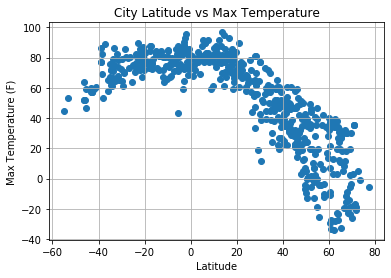

In [56]:
# Calculate the Temperature (F) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("temp-lat.png")

#### Latitude vs. Humidity Plot

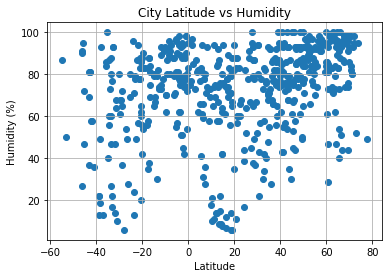

In [57]:
# Calculate the Humidity (%) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("humidity-lat.png")

#### Latitude vs. Cloudiness Plot

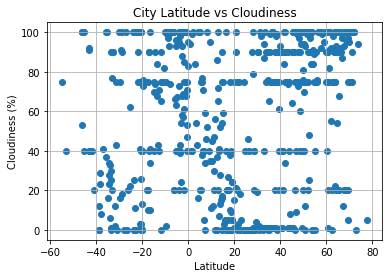

In [58]:
# Calculate the Cloudiness (%) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("cloudiness-lat.png")

#### Latitude vs. Wind Speed Plot

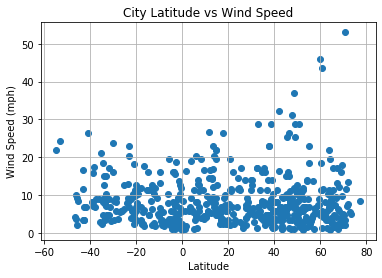

In [59]:
# Calculate the Wind Speed (MPH) vs Latitude
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], marker="o")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save & show
plt.savefig("windspeed-lat.png")

In [60]:
# Now list 3 observations from the data - see Word Document
# First I want to describe the data
city_weather.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,559.000000,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000
mean,57.391771,1.576516e+09,72.838998,20.762719,16.581789,52.216279,8.245564
std,36.961600,5.716741e+01,22.142076,32.901183,90.156005,30.582025,6.572225
min,0.000000,1.576516e+09,6.000000,-54.810000,-179.170000,-34.010000,0.760000
25%,20.000000,1.576516e+09,62.000000,-4.780000,-65.005000,33.530000,3.680000
50%,74.000000,1.576516e+09,79.000000,24.090000,19.700000,60.800000,6.620000
75%,91.000000,1.576516e+09,89.000000,48.585000,100.025000,77.000000,10.590000
max,100.000000,1.576516e+09,100.000000,77.480000,178.420000,96.800000,53.020000


In [61]:
# Create dependencies for stats

In [73]:
#Observation 1: Closer to equator = higher Temp
lat_temp_df = pd.DataFrame({"Lat": lat,
                           "Max Temp": max_temp})
lat_temp_df.head()

,Lat,Max Temp
0,50.68,24.04
1,-8.93,66.97
2,27.97,64.98
3,69.70,-3.66
4,-32.59,64.99


In [74]:
# Now check to see if the two columns are correlated
lat_temp_df.corr()

,Lat,Max Temp
Lat,1.000000,-0.753437
Max Temp,-0.753437,1.000000


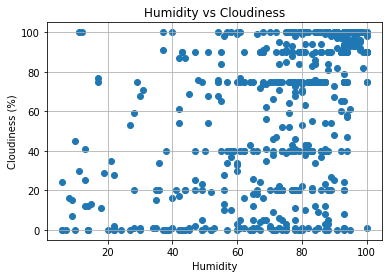

In [67]:
# Observation 2: Humidity & Cloudiness are correlated
# Calculate the Cloudiness (%) vs Latitude
plt.scatter(city_weather["Humidity"], city_weather["Cloudiness"], marker="o")
plt.title("Humidity vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Humidity")
plt.grid(True)

# Save & show
plt.savefig("cloudiness-humidity.png")

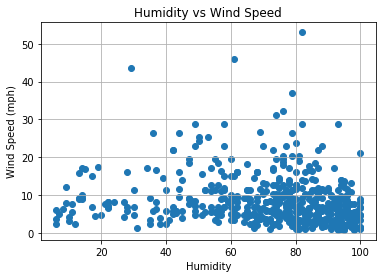

In [68]:
# Observation 3: higher Humidity decreases Wind Speed
plt.scatter(city_weather["Humidity"], city_weather["Wind Speed"], marker="o")
plt.title("Humidity vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Humidity")
plt.grid(True)

# Save & show
plt.savefig("windspeed-humidity.png")